In [20]:
import cv2
import numpy as np

In [2]:
font = cv2.FONT_HERSHEY_SIMPLEX
ix,iy = -1,-1
cx, cy = -1, -1
mode = True
drawing = False

In [3]:
def nothing(x):
    pass

In [4]:
def draw_circle(event,x,y,flags,param):
    global ix,iy,cx,cy,drawing,mode
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
        cx, cy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode > 0:
                cx, cy = x, y
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
            
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cx, cy = x, y
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

In [5]:
#img = np.zeros((512,512,3), np.uint8)
img =cv2.imread('img.jpg')
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
cv2.createTrackbar('value', 'image', 0, 255, nothing)

In [6]:
while(1):
    img = cv2.imread("img.jpg")
    k = cv2.waitKey(1) & 0xFF
    
    if k == ord('m'):
        mode += 1
        if mode > 3:
            mode = 0
            
    elif k == 27:
        break
    
    if ix != -1 and iy != -1:
        cv2.rectangle(img,(ix,iy),(cx,cy),(0,255,0),0) 
        if mode == 1:
            clip = img[iy:cy,ix:cx]
            clip[:,:,1]=0 #green
            clip[:,:,2]=0 #red
        elif mode == 2:
            clip = img[iy:cy,ix:cx]
            clip[:,:,0]=0 #blue
            clip[:,:,2]=0 #red
        elif mode == 3:
            clip = img[iy:cy,ix:cx]
            clip[:,:,0]=0 #blue
            clip[:,:,1]=0 #green  
            
    value = cv2.getTrackbarPos('value', 'image')
                               
    msg = "Mouse position ("+str(ix)+","+str(iy)+") - ("+str(cx)+","+str(cy)+") mode - " +str(mode)
    cv2.putText(img,msg,(10,30),font,.6,(255,255,255),1,cv2.LINE_AA)
    cv2.imshow('image',img)
    
#cv2.destroyAllWindows()

# image copy

In [72]:
def imageshow(img):
    cv2.imshow('image', img)
    k = cv2.waitKey(0)
    if k == 27: 
        cv2.destroyAllWindows()

In [79]:
img = cv2.imread('img.jpg')                 

In [80]:
img.shape

(1000, 1500, 3)

In [85]:
img[0:200, 0:100]=[0,0,255]

In [86]:
img = cv2.imread('img.jpg')
clip = img[600:800, 400:500]
clip[:,:,1]=0 #green
clip[:,:,2]=0 #red

In [87]:
img[100:300, 100:200] = clip

In [ ]:
imageshow(img)

# img border

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [24]:
BLUE = [255,0,0]
img1 = cv2.imread('img_logo.jpg')

In [25]:
img1.shape

(283, 480, 3)

In [26]:
m=300
replicate = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REPLICATE)

In [27]:
replicate.shape

(883, 1080, 3)

In [28]:
reflect = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,m,m,m,m,cv2.BORDER_CONSTANT,value=BLUE)

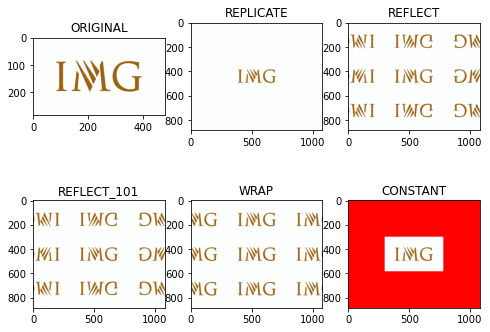

In [38]:
plt.figure(figsize=(8,6))
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

# img blending

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [7]:
img1 = cv2.imread('logo1.png')
img2 = cv2.imread('logo2.png')

dst = cv2.addWeighted(img1,1,img2,1, 0)

In [8]:
def nothing(x):
    pass

In [9]:
cv2.namedWindow('dst')
cv2.createTrackbar('value','dst',0,1000,nothing)

In [10]:
while(1):
    cv2.imshow('dst',dst)

    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    val = cv2.getTrackbarPos('value','dst')
    val = val / 1000

    dst = cv2.addWeighted(img1,1,img2,val, 0)
        
cv2.destroyAllWindows()

# img medianBlur

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def nothing(x):
    pass

In [5]:
cv2.namedWindow('image')
cv2.createTrackbar('medianBlur','image',5,49,nothing)
img = cv2.imread('img1.jpg')
i=5

In [6]:
while(1):
    i = cv2.getTrackbarPos('medianBlur', 'image')
    i = int(i/2)*2+1;
    dst = cv2.medianBlur(img, i)
    cv2.imshow('image', dst)
    
    k = cv2.waitKey(1) & 0xFF
    
    if k == 27:
        break

In [7]:
cv2.destroyAllWindows()